# Loading  required libraries and data

In [63]:
# matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#path
from glob import glob

#save files
import pickle

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


#### Loading prepared datasets  from /data/prepared/*

In [21]:
path_features = glob('../data/prepared/*.parquet')

path_target = glob('../data/prepared/*.bite')

#### Loading ML libraries and fitting to train dataset

In [15]:
# loading sklearn libraries

# --- one algoritm classificators ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# --- ensembles ---
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

# --- metrics ---
from sklearn.metrics import mean_squared_error

# global params
import optuna

In [19]:
# global params will be found by optuna


### Train Test Split and then find the best hyper params

In [31]:
train_datasets = np.random.choice(range(0,len(path_features)), size=10, replace=False)
test_datasets = [i for i in range(0,len(path_features)) if i not in train_datasets]  

### Finding the best Algoritms hyper parameters. Optuna

In [ ]:
rand_train = np.random.choice(train_datasets)
rand_test = np.random.choice(test_datasets)

X_train = pd.read_parquet(path_features[rand_train])
y_train = np.fromfile(path_target[rand_train])

X_test = pd.read_parquet(path_features[rand_test])
y_test = np.fromfile(path_target[rand_test])

In [58]:
# hyper parameters for LGBMRegressor

def objective(trial):       
    num_leaves = trial.suggest_int('num_leaves', 2, 30,step=1 )
    max_depth = trial.suggest_int('max_depth', -1, 30,step=1 )
    learning_rate = trial.suggest_uniform('learning_rate', 0, 4)
    n_estimators = trial.suggest_int('n_estimators', 10, 100,step=1 )
    
    # Регуляризаторы:
    min_split_gain = trial.suggest_uniform('min_split_gain', 0, .1)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 30,step=1 )
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, .9 ) # L1 регуляризатор
    reg_lambda = trial.suggest_uniform('reg_lambda', 0, .9 ) # L2 регуляризатор
    
    # Bootstrap - OFF (subsample_freq=0)   
    
    lgb_reg = LGBMRegressor(boosting_type='gbdt', num_leaves=num_leaves, max_depth= max_depth,
                                learning_rate= learning_rate, n_estimators=n_estimators,n_jobs = -1, 
                                min_split_gain=min_split_gain, min_child_samples=min_child_samples,
                                subsample_freq = 0, objective='regression',
                                reg_alpha=reg_alpha, reg_lambda =reg_lambda  )

    lgb_reg.fit(X_train,y_train)
    y_pred = lgb_reg.predict(X_test)
    return mean_squared_error(y_test,y_pred)

study = optuna.create_study(direction = 'minimize' )
study.optimize(objective, n_trials=1000)

!telegram-send "Job's_Done" 


lgb_reg_params = study.best_params

[I 2022-01-22 19:38:53,712] A new study created in memory with name: no-name-1611f03b-5923-4dd5-9d83-cf73fb299998
[I 2022-01-22 19:38:58,703] Trial 0 finished with value: 0.34881416376471247 and parameters: {'num_leaves': 11, 'max_depth': 2, 'learning_rate': 1.827101649919567, 'n_estimators': 73, 'min_split_gain': 0.0689834876716794, 'min_child_samples': 28, 'reg_alpha': 0.0006821171695245543, 'reg_lambda': 0.010201803532392107}. Best is trial 0 with value: 0.34881416376471247.
[I 2022-01-22 19:39:03,754] Trial 1 finished with value: 0.1573969823244057 and parameters: {'num_leaves': 9, 'max_depth': 6, 'learning_rate': 0.3032562313719649, 'n_estimators': 54, 'min_split_gain': 0.03436894885195581, 'min_child_samples': 18, 'reg_alpha': 0.4106261151388983, 'reg_lambda': 0.5146829138662478}. Best is trial 1 with value: 0.1573969823244057.
[I 2022-01-22 19:39:25,362] Trial 2 finished with value: 9.23894343478564e+72 and parameters: {'num_leaves': 13, 'max_depth': 30, 'learning_rate': 3.42877

[I 2022-01-22 19:41:32,171] Trial 22 finished with value: 0.11514345388953105 and parameters: {'num_leaves': 27, 'max_depth': 26, 'learning_rate': 0.07693149119435154, 'n_estimators': 22, 'min_split_gain': 0.0005729768035916594, 'min_child_samples': 15, 'reg_alpha': 0.6781774043044715, 'reg_lambda': 0.6668698615817444}. Best is trial 13 with value: 0.06020705789926985.
[I 2022-01-22 19:41:38,313] Trial 23 finished with value: 0.05553433246524856 and parameters: {'num_leaves': 24, 'max_depth': 19, 'learning_rate': 0.009005840229067568, 'n_estimators': 22, 'min_split_gain': 0.01837040001484795, 'min_child_samples': 11, 'reg_alpha': 0.7981578353403542, 'reg_lambda': 0.4993472209156457}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:41:43,460] Trial 24 finished with value: 0.1591653309151727 and parameters: {'num_leaves': 21, 'max_depth': 18, 'learning_rate': 0.6699139838357184, 'n_estimators': 43, 'min_split_gain': 0.02056541624499233, 'min_child_samples': 11, 'reg_al

[I 2022-01-22 19:44:02,237] Trial 44 finished with value: 0.15862927712797834 and parameters: {'num_leaves': 25, 'max_depth': 23, 'learning_rate': 0.49990885129927504, 'n_estimators': 68, 'min_split_gain': 0.013363768052520146, 'min_child_samples': 9, 'reg_alpha': 0.14923938558199312, 'reg_lambda': 0.8592350443276254}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:44:08,257] Trial 45 finished with value: 0.15345008823507275 and parameters: {'num_leaves': 23, 'max_depth': 11, 'learning_rate': 0.27274241374630487, 'n_estimators': 73, 'min_split_gain': 0.0214119904220907, 'min_child_samples': 12, 'reg_alpha': 0.5911378878365388, 'reg_lambda': 0.17985114032608024}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:44:13,585] Trial 46 finished with value: 0.16961065510480752 and parameters: {'num_leaves': 15, 'max_depth': 29, 'learning_rate': 1.0058236640352867, 'n_estimators': 80, 'min_split_gain': 0.02549002199613686, 'min_child_samples': 14, 'reg_alp

[I 2022-01-22 19:46:34,501] Trial 66 finished with value: 0.15453806577859125 and parameters: {'num_leaves': 22, 'max_depth': 19, 'learning_rate': 0.37288338545478955, 'n_estimators': 32, 'min_split_gain': 0.03062226546519677, 'min_child_samples': 12, 'reg_alpha': 0.4273758990946981, 'reg_lambda': 0.4663289382194095}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:46:40,217] Trial 67 finished with value: 0.06516799580375049 and parameters: {'num_leaves': 26, 'max_depth': 21, 'learning_rate': 0.0009030906562850338, 'n_estimators': 16, 'min_split_gain': 0.04951150375054966, 'min_child_samples': 8, 'reg_alpha': 0.6250060991796876, 'reg_lambda': 0.43365474921794966}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:46:46,519] Trial 68 finished with value: 0.15518838226408224 and parameters: {'num_leaves': 14, 'max_depth': 16, 'learning_rate': 0.1671835662652195, 'n_estimators': 23, 'min_split_gain': 0.003713906133113284, 'min_child_samples': 27, 'reg_a

[I 2022-01-22 19:49:08,610] Trial 88 finished with value: 0.15473952909366945 and parameters: {'num_leaves': 17, 'max_depth': 19, 'learning_rate': 0.23737934061102203, 'n_estimators': 62, 'min_split_gain': 0.03219511608782756, 'min_child_samples': 7, 'reg_alpha': 0.6489445121294168, 'reg_lambda': 0.06829634852093266}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:49:14,291] Trial 89 finished with value: 0.10431253473323623 and parameters: {'num_leaves': 26, 'max_depth': 24, 'learning_rate': 0.10833301254304536, 'n_estimators': 13, 'min_split_gain': 0.012950946291742912, 'min_child_samples': 29, 'reg_alpha': 0.49150836166315215, 'reg_lambda': 0.20181407212443964}. Best is trial 23 with value: 0.05553433246524856.
[I 2022-01-22 19:49:21,223] Trial 90 finished with value: 0.05685896132697649 and parameters: {'num_leaves': 22, 'max_depth': 16, 'learning_rate': 0.00783093158194105, 'n_estimators': 20, 'min_split_gain': 0.028569439637973548, 'min_child_samples': 11, 'reg

[I 2022-01-22 19:51:32,236] Trial 110 finished with value: 206882.76192916007 and parameters: {'num_leaves': 23, 'max_depth': 22, 'learning_rate': 2.1881673751716044, 'n_estimators': 41, 'min_split_gain': 0.017398860518767968, 'min_child_samples': 8, 'reg_alpha': 0.7216993574500644, 'reg_lambda': 0.381998434446548}. Best is trial 91 with value: 0.05472000784016907.
[I 2022-01-22 19:51:40,270] Trial 111 finished with value: 493253810711.20514 and parameters: {'num_leaves': 24, 'max_depth': 13, 'learning_rate': 2.6196678160296383, 'n_estimators': 30, 'min_split_gain': 0.021505782912800264, 'min_child_samples': 11, 'reg_alpha': 0.6382697030113209, 'reg_lambda': 0.4227363018692891}. Best is trial 91 with value: 0.05472000784016907.
[I 2022-01-22 19:51:48,744] Trial 112 finished with value: 0.06080918713299162 and parameters: {'num_leaves': 24, 'max_depth': 17, 'learning_rate': 0.002098516528942415, 'n_estimators': 35, 'min_split_gain': 0.02525863511197083, 'min_child_samples': 10, 'reg_alp

[I 2022-01-22 19:53:58,579] Trial 132 finished with value: 0.05170000911969377 and parameters: {'num_leaves': 2, 'max_depth': 14, 'learning_rate': 0.06050200863206649, 'n_estimators': 31, 'min_split_gain': 0.028196730282705876, 'min_child_samples': 9, 'reg_alpha': 0.3924842291890882, 'reg_lambda': 0.33548727250985255}. Best is trial 132 with value: 0.05170000911969377.
[I 2022-01-22 19:54:03,054] Trial 133 finished with value: 0.17885157279235228 and parameters: {'num_leaves': 2, 'max_depth': 14, 'learning_rate': 1.7179322086575683, 'n_estimators': 30, 'min_split_gain': 0.03281417786266911, 'min_child_samples': 9, 'reg_alpha': 0.41522205011475294, 'reg_lambda': 0.28248674821583974}. Best is trial 132 with value: 0.05170000911969377.
[I 2022-01-22 19:54:09,773] Trial 134 finished with value: 0.13687085397611687 and parameters: {'num_leaves': 4, 'max_depth': 15, 'learning_rate': 0.10189460167590585, 'n_estimators': 24, 'min_split_gain': 0.02874776437380902, 'min_child_samples': 8, 'reg_a

[I 2022-01-22 19:55:50,260] Trial 154 finished with value: 0.06707849837336921 and parameters: {'num_leaves': 2, 'max_depth': 23, 'learning_rate': 0.1774165051869045, 'n_estimators': 18, 'min_split_gain': 0.02695407822264605, 'min_child_samples': 8, 'reg_alpha': 0.421779965415761, 'reg_lambda': 0.3325364736445381}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 19:55:55,424] Trial 155 finished with value: 0.10153239176166917 and parameters: {'num_leaves': 3, 'max_depth': 25, 'learning_rate': 0.07918303010040854, 'n_estimators': 26, 'min_split_gain': 0.03044145554497122, 'min_child_samples': 6, 'reg_alpha': 0.4058042734264684, 'reg_lambda': 0.3543266987220745}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 19:56:00,025] Trial 156 finished with value: 0.15393580730065073 and parameters: {'num_leaves': 4, 'max_depth': 22, 'learning_rate': 0.30129923905683614, 'n_estimators': 20, 'min_split_gain': 0.023831480185889986, 'min_child_samples': 10, 'reg_alph

[I 2022-01-22 19:58:07,394] Trial 176 finished with value: 0.15605493668038184 and parameters: {'num_leaves': 24, 'max_depth': 25, 'learning_rate': 0.256458603557043, 'n_estimators': 31, 'min_split_gain': 0.02591492435138865, 'min_child_samples': 10, 'reg_alpha': 0.4049355026215441, 'reg_lambda': 0.2607666817339226}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 19:58:15,140] Trial 177 finished with value: 0.06417073399748612 and parameters: {'num_leaves': 23, 'max_depth': 14, 'learning_rate': 0.0009857043705405232, 'n_estimators': 27, 'min_split_gain': 0.016185980444663184, 'min_child_samples': 8, 'reg_alpha': 0.4309446341757516, 'reg_lambda': 0.2990782483846107}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 19:58:24,300] Trial 178 finished with value: 0.057872793848218695 and parameters: {'num_leaves': 25, 'max_depth': 24, 'learning_rate': 0.0036103674868249343, 'n_estimators': 36, 'min_split_gain': 0.03192258523413445, 'min_child_samples': 9, '

[I 2022-01-22 20:00:57,772] Trial 198 finished with value: 0.055865650759850755 and parameters: {'num_leaves': 21, 'max_depth': 23, 'learning_rate': 0.007492597992696718, 'n_estimators': 54, 'min_split_gain': 0.029513153084269526, 'min_child_samples': 11, 'reg_alpha': 0.48345702307618316, 'reg_lambda': 0.2517060302191369}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:01:09,285] Trial 199 finished with value: 0.06268665654404607 and parameters: {'num_leaves': 21, 'max_depth': 23, 'learning_rate': 0.0007492998737443895, 'n_estimators': 60, 'min_split_gain': 0.034722698605296386, 'min_child_samples': 11, 'reg_alpha': 0.8427551935220151, 'reg_lambda': 0.22286496516695606}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:01:15,420] Trial 200 finished with value: 0.15424273595113178 and parameters: {'num_leaves': 21, 'max_depth': 23, 'learning_rate': 0.21118107991639037, 'n_estimators': 51, 'min_split_gain': 0.02697398851732506, 'min_child_samples':

[I 2022-01-22 20:03:30,070] Trial 220 finished with value: 0.06466608139496045 and parameters: {'num_leaves': 22, 'max_depth': 29, 'learning_rate': 0.0013472939073335948, 'n_estimators': 15, 'min_split_gain': 0.014501789788139739, 'min_child_samples': 4, 'reg_alpha': 0.8241131285417191, 'reg_lambda': 0.23088194985261407}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:03:36,505] Trial 221 finished with value: 0.05624062520028513 and parameters: {'num_leaves': 21, 'max_depth': 27, 'learning_rate': 0.009510788346814696, 'n_estimators': 18, 'min_split_gain': 0.023478558173715327, 'min_child_samples': 5, 'reg_alpha': 0.7451878091029436, 'reg_lambda': 0.2128100937129862}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:03:42,825] Trial 222 finished with value: 0.06545162219641705 and parameters: {'num_leaves': 21, 'max_depth': 27, 'learning_rate': 0.0005917415675973665, 'n_estimators': 19, 'min_split_gain': 0.022767727561983496, 'min_child_samples': 

[I 2022-01-22 20:05:47,916] Trial 242 finished with value: 0.06605147114435429 and parameters: {'num_leaves': 21, 'max_depth': 26, 'learning_rate': 0.00018843186614984127, 'n_estimators': 25, 'min_split_gain': 0.021458440750677998, 'min_child_samples': 4, 'reg_alpha': 0.796606010752965, 'reg_lambda': 0.19855730124516874}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:05:54,228] Trial 243 finished with value: 0.056092003727634725 and parameters: {'num_leaves': 22, 'max_depth': 25, 'learning_rate': 0.008424538290141798, 'n_estimators': 21, 'min_split_gain': 0.02358016054831279, 'min_child_samples': 3, 'reg_alpha': 0.8270221899883394, 'reg_lambda': 0.30647903396373966}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:06:00,522] Trial 244 finished with value: 0.11763083725157553 and parameters: {'num_leaves': 22, 'max_depth': 25, 'learning_rate': 0.08292724519650255, 'n_estimators': 21, 'min_split_gain': 0.023263210188556566, 'min_child_samples': 3

[I 2022-01-22 20:08:01,443] Trial 264 finished with value: 0.09335622637277331 and parameters: {'num_leaves': 2, 'max_depth': 27, 'learning_rate': 0.27399595919899566, 'n_estimators': 20, 'min_split_gain': 0.022900738944093394, 'min_child_samples': 9, 'reg_alpha': 0.8295205651397434, 'reg_lambda': 0.3727733372101317}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:08:09,041] Trial 265 finished with value: 0.13896982909493727 and parameters: {'num_leaves': 23, 'max_depth': 24, 'learning_rate': 0.08025366412729541, 'n_estimators': 33, 'min_split_gain': 0.02912257458977264, 'min_child_samples': 11, 'reg_alpha': 0.47702976974865374, 'reg_lambda': 0.2435009816998675}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:08:15,639] Trial 266 finished with value: 0.1535504116733717 and parameters: {'num_leaves': 21, 'max_depth': 13, 'learning_rate': 0.15089169573751998, 'n_estimators': 25, 'min_split_gain': 0.025219301591121113, 'min_child_samples': 8, 'reg

[I 2022-01-22 20:10:28,820] Trial 286 finished with value: 0.06016625646251228 and parameters: {'num_leaves': 21, 'max_depth': 16, 'learning_rate': 0.002498032651807389, 'n_estimators': 34, 'min_split_gain': 0.028841638076863536, 'min_child_samples': 13, 'reg_alpha': 0.5443275458469556, 'reg_lambda': 0.3443195748516418}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:10:33,742] Trial 287 finished with value: 0.15319777914735558 and parameters: {'num_leaves': 23, 'max_depth': 24, 'learning_rate': 0.28877547199895515, 'n_estimators': 21, 'min_split_gain': 0.02676534235019488, 'min_child_samples': 12, 'reg_alpha': 0.3929689127378211, 'reg_lambda': 0.28643237997835413}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:10:40,183] Trial 288 finished with value: 0.12363190406327135 and parameters: {'num_leaves': 24, 'max_depth': 15, 'learning_rate': 0.07364967993295858, 'n_estimators': 26, 'min_split_gain': 0.024013175304637948, 'min_child_samples': 9, 

[I 2022-01-22 20:13:00,342] Trial 308 finished with value: 0.05863781802683308 and parameters: {'num_leaves': 25, 'max_depth': 25, 'learning_rate': 0.001247538699892155, 'n_estimators': 89, 'min_split_gain': 0.024224416817674076, 'min_child_samples': 7, 'reg_alpha': 0.6694705801543168, 'reg_lambda': 0.37294281205667024}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:13:08,438] Trial 309 finished with value: 2973967976.2852755 and parameters: {'num_leaves': 26, 'max_depth': 10, 'learning_rate': 2.67057176373722, 'n_estimators': 23, 'min_split_gain': 0.026833012279319186, 'min_child_samples': 8, 'reg_alpha': 0.23228714614904455, 'reg_lambda': 0.2581935664557116}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:13:14,822] Trial 310 finished with value: 0.1252580769453539 and parameters: {'num_leaves': 21, 'max_depth': 20, 'learning_rate': 0.09399876012499728, 'n_estimators': 21, 'min_split_gain': 0.02047717772587263, 'min_child_samples': 7, 'reg_a

[I 2022-01-22 20:15:32,747] Trial 330 finished with value: 0.06160041764447034 and parameters: {'num_leaves': 23, 'max_depth': 26, 'learning_rate': 0.002674160658500402, 'n_estimators': 23, 'min_split_gain': 0.032658425879224136, 'min_child_samples': 9, 'reg_alpha': 0.46724282940016965, 'reg_lambda': 0.34498386719136265}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:15:40,563] Trial 331 finished with value: 0.06208245177633664 and parameters: {'num_leaves': 22, 'max_depth': 13, 'learning_rate': 0.0018843034410901153, 'n_estimators': 29, 'min_split_gain': 0.022208693953739877, 'min_child_samples': 13, 'reg_alpha': 0.5835787322993979, 'reg_lambda': 0.30687038821947893}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:15:46,385] Trial 332 finished with value: 0.14337392077118344 and parameters: {'num_leaves': 23, 'max_depth': 22, 'learning_rate': 0.12185142771587402, 'n_estimators': 21, 'min_split_gain': 0.03582285006404463, 'min_child_samples': 

[I 2022-01-22 20:18:00,428] Trial 352 finished with value: 0.0649325933850067 and parameters: {'num_leaves': 24, 'max_depth': 23, 'learning_rate': 0.0004598041339848036, 'n_estimators': 37, 'min_split_gain': 0.04521393002123891, 'min_child_samples': 9, 'reg_alpha': 0.1376801177033862, 'reg_lambda': 0.3473182436066279}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:18:06,544] Trial 353 finished with value: 0.14187835476990895 and parameters: {'num_leaves': 23, 'max_depth': 22, 'learning_rate': 0.12249577368851297, 'n_estimators': 21, 'min_split_gain': 0.02216479462293604, 'min_child_samples': 7, 'reg_alpha': 0.19323618259990158, 'reg_lambda': 0.3798600638189065}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:18:12,889] Trial 354 finished with value: 0.11538958455806216 and parameters: {'num_leaves': 20, 'max_depth': 18, 'learning_rate': 0.06550156763121505, 'n_estimators': 26, 'min_split_gain': 0.02527953549689417, 'min_child_samples': 10, 're

[I 2022-01-22 20:21:02,081] Trial 374 finished with value: 0.06169513702574268 and parameters: {'num_leaves': 25, 'max_depth': 26, 'learning_rate': 0.0010041313190656473, 'n_estimators': 60, 'min_split_gain': 0.014289167578112088, 'min_child_samples': 20, 'reg_alpha': 0.46286031811964634, 'reg_lambda': 0.39288217328445774}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:21:08,529] Trial 375 finished with value: 0.14989515678012832 and parameters: {'num_leaves': 18, 'max_depth': 25, 'learning_rate': 0.2133044869929815, 'n_estimators': 62, 'min_split_gain': 0.0212467939920985, 'min_child_samples': 23, 'reg_alpha': 0.4534068196570455, 'reg_lambda': 0.36876070853433635}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:21:19,394] Trial 376 finished with value: 0.054730395399542255 and parameters: {'num_leaves': 25, 'max_depth': 27, 'learning_rate': 0.004875725109864268, 'n_estimators': 58, 'min_split_gain': 0.019360352799676045, 'min_child_samples': 

[I 2022-01-22 20:24:26,872] Trial 396 finished with value: 0.12278210578761001 and parameters: {'num_leaves': 2, 'max_depth': 25, 'learning_rate': 0.18177695882153033, 'n_estimators': 63, 'min_split_gain': 0.022948382093937944, 'min_child_samples': 20, 'reg_alpha': 0.508534221598855, 'reg_lambda': 0.3481254967362957}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:24:35,520] Trial 397 finished with value: 0.1515646842245572 and parameters: {'num_leaves': 27, 'max_depth': 26, 'learning_rate': 0.07374721615068579, 'n_estimators': 53, 'min_split_gain': 0.0212063262060646, 'min_child_samples': 21, 'reg_alpha': 0.47677563645411614, 'reg_lambda': 0.38049658718738094}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:24:44,378] Trial 398 finished with value: 0.15179412634253792 and parameters: {'num_leaves': 25, 'max_depth': 24, 'learning_rate': 0.07197720298893504, 'n_estimators': 59, 'min_split_gain': 0.01836116335948794, 'min_child_samples': 24, 'reg

[I 2022-01-22 20:27:56,922] Trial 418 finished with value: 0.138708695943536 and parameters: {'num_leaves': 3, 'max_depth': 25, 'learning_rate': 0.13790437968626928, 'n_estimators': 70, 'min_split_gain': 0.026266867504385415, 'min_child_samples': 17, 'reg_alpha': 0.3198975497208372, 'reg_lambda': 0.3792309359497464}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:28:06,100] Trial 419 finished with value: 0.1497788915056503 and parameters: {'num_leaves': 24, 'max_depth': 24, 'learning_rate': 0.07230263081025005, 'n_estimators': 50, 'min_split_gain': 0.021610025513133627, 'min_child_samples': 23, 'reg_alpha': 0.508507845336441, 'reg_lambda': 0.3348591180800907}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:28:17,992] Trial 420 finished with value: 0.05585568235725171 and parameters: {'num_leaves': 23, 'max_depth': 27, 'learning_rate': 0.00708362476753249, 'n_estimators': 57, 'min_split_gain': 0.01818302013363574, 'min_child_samples': 26, 'reg_a

[I 2022-01-22 20:31:23,819] Trial 440 finished with value: 0.06477410823869335 and parameters: {'num_leaves': 25, 'max_depth': 27, 'learning_rate': 0.00039346568870085585, 'n_estimators': 49, 'min_split_gain': 0.01651572160664764, 'min_child_samples': 9, 'reg_alpha': 0.37669455300038335, 'reg_lambda': 0.35014609827991555}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:31:32,403] Trial 441 finished with value: 0.154483569226893 and parameters: {'num_leaves': 23, 'max_depth': 28, 'learning_rate': 0.09309405231030682, 'n_estimators': 57, 'min_split_gain': 0.015130960913007715, 'min_child_samples': 9, 'reg_alpha': 0.353070420709176, 'reg_lambda': 0.383205623221337}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:31:38,271] Trial 442 finished with value: 0.16213433860038357 and parameters: {'num_leaves': 24, 'max_depth': 27, 'learning_rate': 0.3138985614896209, 'n_estimators': 60, 'min_split_gain': 0.017991837835494698, 'min_child_samples': 29, 're

[I 2022-01-22 20:34:37,821] Trial 462 finished with value: 0.15754336135040847 and parameters: {'num_leaves': 23, 'max_depth': 25, 'learning_rate': 0.20313110613622104, 'n_estimators': 65, 'min_split_gain': 0.011394032445989232, 'min_child_samples': 25, 'reg_alpha': 0.30957555708697626, 'reg_lambda': 0.48836322693820655}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:34:49,733] Trial 463 finished with value: 0.055269792666547385 and parameters: {'num_leaves': 23, 'max_depth': 25, 'learning_rate': 0.005466599538391236, 'n_estimators': 68, 'min_split_gain': 0.010942047515443445, 'min_child_samples': 24, 'reg_alpha': 0.3552495696694188, 'reg_lambda': 0.4991341834572396}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:35:04,722] Trial 464 finished with value: 0.05782442523687921 and parameters: {'num_leaves': 23, 'max_depth': 25, 'learning_rate': 0.007030141296773276, 'n_estimators': 69, 'min_split_gain': 0.007440788452666664, 'min_child_samples':

[I 2022-01-22 20:38:05,124] Trial 484 finished with value: 0.1540664659758028 and parameters: {'num_leaves': 9, 'max_depth': 13, 'learning_rate': 0.05990613532860598, 'n_estimators': 77, 'min_split_gain': 0.014711032198973403, 'min_child_samples': 25, 'reg_alpha': 0.40186689099955675, 'reg_lambda': 0.4794604607827426}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:38:11,517] Trial 485 finished with value: 0.1583044415923947 and parameters: {'num_leaves': 24, 'max_depth': 14, 'learning_rate': 0.22796660248175155, 'n_estimators': 61, 'min_split_gain': 0.012803282796720735, 'min_child_samples': 8, 'reg_alpha': 0.2877202411734592, 'reg_lambda': 0.4637226499366529}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:38:17,151] Trial 486 finished with value: 0.13984520470647147 and parameters: {'num_leaves': 3, 'max_depth': 25, 'learning_rate': 0.13875713996518926, 'n_estimators': 64, 'min_split_gain': 0.016291883046716985, 'min_child_samples': 24, 'reg

[I 2022-01-22 20:42:00,177] Trial 506 finished with value: 1.1151291373409179e+53 and parameters: {'num_leaves': 19, 'max_depth': 26, 'learning_rate': 3.6037858742363262, 'n_estimators': 65, 'min_split_gain': 0.0037860317886989087, 'min_child_samples': 10, 'reg_alpha': 0.3501115236570609, 'reg_lambda': 0.5934154928410996}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:42:12,420] Trial 507 finished with value: 0.15337704418166107 and parameters: {'num_leaves': 17, 'max_depth': 27, 'learning_rate': 0.06926335334133481, 'n_estimators': 72, 'min_split_gain': 0.0003122159603803076, 'min_child_samples': 9, 'reg_alpha': 0.41749177137679494, 'reg_lambda': 0.7024407082664166}. Best is trial 153 with value: 0.04681221426654529.
[I 2022-01-22 20:42:26,249] Trial 508 finished with value: 0.054872146152892674 and parameters: {'num_leaves': 19, 'max_depth': 24, 'learning_rate': 0.004770055499519258, 'n_estimators': 70, 'min_split_gain': 0.00303028515522064, 'min_child_samples':

KeyboardInterrupt: 

In [64]:
with open('../models/ML_algo_params/lgb_reg_params.pickle' , 'wb') as f:
    pickle.dump(lgb_reg_params,f)
f.close() 

In [ ]:
# hyper parameters for RandomForestRegressor 

def objective(trial):
    max_leaf_nodes  = trial.suggest_int('max_leaf_nodes', 2, 30,step=1 )
    max_depth = trial.suggest_int('max_depth', 3, 500,step=1 )
    n_estimators = trial.suggest_int('n_estimators', 10, 100,step=1 )

    # Регуляризаторы:
    min_impurity_decrease = trial.suggest_uniform('min_impurity_decrease', 0, .1)
    ccp_alpha  = trial.suggest_uniform('ccp_alpha', 0, .9 ) # L1 регуляризатор
    
    # Bootstrap - OFF. 
    
    rf = RandomForestRegressor(n_estimators=n_estimators, criterion='squared_error', max_depth=max_depth, n_jobs=-1,
                                    min_impurity_decrease=min_impurity_decrease,bootstrap=False,
                                    max_leaf_nodes =max_leaf_nodes , ccp_alpha =ccp_alpha)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    return mean_squared_error(y_test,y_pred)

study = optuna.create_study(direction = 'minimize' )
study.optimize(objective, n_trials=1000)

!telegram-send "Job's_Done" 

rf_params = study.best_params

In [67]:
with open('../models/ML_algo_params/rf_params.pickle' , 'wb') as f:
    pickle.dump(rf_params,f)
f.close() 

In [ ]:
# hyper parameters for XGBRegressor 

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100,step=1 )
    max_depth = trial.suggest_int('max_depth', 3, 500,step=1 )
    learning_rate = trial.suggest_uniform('learning_rate', 0, 4)

    # Регуляризаторы:
    min_impurity_decrease = trial.suggest_uniform('min_impurity_decrease', 0, .1)
    ccp_alpha  = trial.suggest_uniform('ccp_alpha', 0, .9 ) # L1 регуляризатор
    
    # Регуляризаторы:
    gamma = trial.suggest_uniform('gamma', 0.001, .1) #Minimum loss reduction required
    min_child_weight = trial.suggest_uniform('min_child_weight', 3, 30) #Minimum sum of instance needed in a child
    reg_alpha = trial.suggest_uniform('reg_alpha', 0, .9 ) # L1 регуляризатор
    reg_lambda = trial.suggest_uniform('reg_lambda', 0, .9 ) # L2 регуляризатор
    
    # Bootstrap - OFF. subsample =1 #Subsample ratio 
    
    xgb_reg = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, 
                           objective='reg:squarederror', n_jobs=-1,random_state =255,
                          subsample =1,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                          gamma=gamma,min_child_weight=min_child_weight,
                          learning_rate=learning_rate )
    
    xgb_reg.fit(X_train,y_train)
    y_pred = xgb_reg.predict(X_test)
    return mean_squared_error(y_test,y_pred)

study = optuna.create_study(direction = 'minimize' )
study.optimize(objective, n_trials=500)

!telegram-send "Job's_Done" 

xgb_reg_params = study.best_params

In [73]:
with open('../models/ML_algo_params/xgb_reg_params.pickle' , 'wb') as f:
    pickle.dump(xgb_reg_params,f)
f.close()

In [ ]:
# hyper parameters for DecisionTreeRegressor 

def objective(trial):
    max_leaf_nodes  = trial.suggest_int('max_leaf_nodes', 2, 30,step=1 )
    max_depth = trial.suggest_int('max_depth', 3, 500,step=1 )

    # Регуляризаторы:
    min_weight_fraction_leaf = trial.suggest_uniform('min_weight_fraction_leaf', 0, .1)
    min_impurity_decrease = trial.suggest_uniform('min_impurity_decrease', 0, .1)
    ccp_alpha  = trial.suggest_uniform('ccp_alpha', 0, .9 ) # L1 регуляризатор
        
    dt = DecisionTreeRegressor(criterion='squared_error' , splitter='best',
                               max_depth=max_depth , min_weight_fraction_leaf=min_weight_fraction_leaf,
                                random_state=255 , max_leaf_nodes=max_leaf_nodes,
                                min_impurity_decrease=min_impurity_decrease , ccp_alpha=ccp_alpha)
    
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    return mean_squared_error(y_test,y_pred)

study = optuna.create_study(direction = 'minimize' )
study.optimize(objective, n_trials=300)

!telegram-send "Job's_Done" 

dt_params = study.best_params

In [75]:
with open('../models/ML_algo_params/dt_params.pickle' , 'wb') as f:
    pickle.dump(dt_params,f)
f.close()

###  Make Train function:

In [80]:
def HuberLoss(y_true,y_pred,delta=1):
    Loss = 0.
    d_x = y_true-y_pred
    Loss += np.sum(0.5 * (d_x[d_x < delta] )**2)
    Loss += np.sum(delta * (d_x[d_x > delta] - 0.5*delta) )
    return Loss/len(y_true)   

In [81]:
def train_estimator(estimator):
    for i in train_datasets:
        X = pd.read_parquet(path_features[i])
        y = np.fromfile(path_target[i])    
        estimator.fit(X,y)
    return estimator

In [82]:
def test_estimator(estimator):
    MSE_score = 0.
    HuberLoss_score = 0.

    for i in test_datasets:
        X = pd.read_parquet(path_features[i])
        y = np.fromfile(path_target[i])    
        
        y_pred = estimator.predict(X)
        
        MSE_score += mean_squared_error(y,y_pred)
        HuberLoss_score += HuberLoss(y,y_pred)

    MSE_score /= len(test_datasets)
    HuberLoss_score /= len(test_datasets)
    
    return MSE_score, HuberLoss_score

### Train ML Algoritms with the best hyper params:

In [97]:
algoritms = [{'name': 'DecisionTree' , 'model':DecisionTreeRegressor()  ,'params': 'dt_params'  },
             {'name': 'RandomForest' , 'model':RandomForestRegressor()  ,'params': 'rf_params' },
             {'name': 'XGBRegressor' , 'model':XGBRegressor()  ,'params': 'xgb_reg_params' },
             {'name': 'LGBMRegressor' , 'model':LGBMRegressor()  ,'params': 'lgb_reg_params'  },
             {'name': 'LR' , 'model':LinearRegression()  ,'params': 'lr_params'  }]

In [ ]:
algo_results = {}

for algo in algoritms:
    
    #loading best params
    with open(f'../models/ML_algo_params/{algo["params"]}.pickle' , 'rb') as f:
        params = pickle.load(f)
    f.close()
    
    #making estimator
    est = algo['model'].set_params(**params)
    
    #train and storing results
    train_estimator(est)
    
    #save estimator for future use:
    with open(f'../models/ML_fitted_models/{algo["name"]}.pickle','wb') as f:
        pickle.dump(est ,f  )
    f.close()
    
    algo_results[algo['name']] = test_estimator(est)

In [118]:
df_algo_results = pd.DataFrame(algo_results,index=['MSE_Loss','HuberLoss']).T
df_algo_results

,MSE_Loss,HuberLoss
DecisionTree,0.097623,0.048812
RandomForest,0.097429,0.048715
XGBRegressor,0.214949,0.106837
LGBMRegressor,0.076177,0.038088
LR,72.072907,19.054029


<Figure size 1152x576 with 0 Axes>

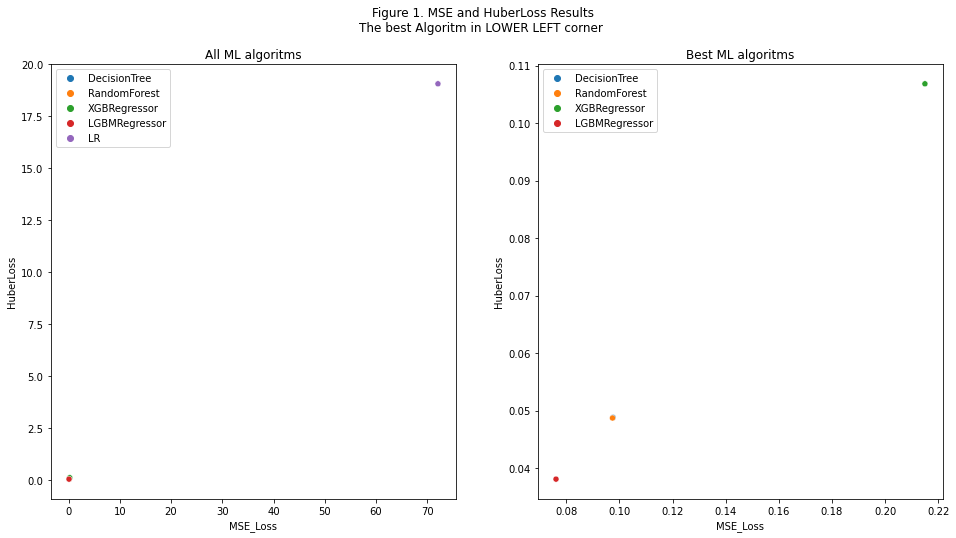

In [128]:
fig = plt.figure(figsize=(16, 8))
fig, (ax0,ax1) = plt.subplots( nrows=1, ncols=2, figsize=(16, 8) )

ax0.set_title('All ML algoritms')
sns.scatterplot(x= 'MSE_Loss' ,y='HuberLoss', data = df_algo_results,
                hue=df_algo_results.index, ax=ax0)

ax1.set_title('Best ML algoritms')
sns.scatterplot(x= 'MSE_Loss' ,y='HuberLoss', data = df_algo_results.iloc[:-1,:],
                hue=df_algo_results.index[:-1], ax=ax1)

fig.suptitle('Figure 1. MSE and HuberLoss Results\nThe best Algoritm in LOWER LEFT corner ')
fig.savefig('../models/comparison/Algoritms MSE and HuberLoss Results.png')
plt.show();


#### ML part Conclusion:

1. The best estimator is __LGBMRegressor__ because it has the lowest MSE and Huber loss values
1. The second estimator is __RandomForest Regressor__ as per MSE and Huber loss values (please see the Figure 1 above)

### NN Part¶

In [129]:
# torch
import torch
from tqdm import tqdm


In [220]:
SEP_LEVELS = int(2.65 * 1000 )

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear = torch.nn.Linear(300,300, bias = True, dtype=torch.float32)
        
        self.emb_lvl = torch.nn.Embedding(SEP_LEVELS,300)
        #self.linear_attention = torch.nn.Linear(300,300, dtype=torch.float32)
        
        self.lstm = torch.nn.LSTM(input_size=300, hidden_size=128,batch_first = True, bidirectional=True) #dropout=.3,num_layers=2
        self.linear_1 = torch.nn.Linear(in_features=128, out_features = 1, bias = True)
        
    def forward(self,x,previous_y):
                        
        # pass pipe pressures lags through Dense 300 ->300
        after_linear = torch.nn.functional.relu( self.linear(x) )
        
        # get previous separator level embedding
        previous_separator_level = round(previous_y ,3) * 1000      # previous_y = y[0]
        previous_separator_level = int( previous_separator_level ) 
        previous_separator_level = torch.tensor( [ previous_separator_level ] )
        previous_separator_level_emb = self.emb_lvl(previous_separator_level)     # Делаем ему размер emb = 300
        previous_separator_level_emb = previous_separator_level_emb.reshape(1,300)
        
        # get attention
        attention = after_linear * previous_separator_level_emb
        #attention = self.linear_attention(attention)
        attention_softmax = torch.nn.functional.softmax( attention , dim=0 )
        
        # multiply presure lags with attention softmax 
        final_state = x * attention_softmax
        final_state = final_state.reshape(1,5,300)
        
        # LSTM
        embeddings, (shortterm, longterm) = self.lstm(final_state)
        longterm = torch.add(longterm[0],longterm[1])/2
        predict = self.linear_1(longterm)
        
        return predict
        
    def fit(self, X_features, y_target):
    
        EPOCHS = 50 
        criteria = torch.nn.HuberLoss()
        ONE_EPOCH_SIZE = len(y_target) - 5
        min_loss = 0.2
        true_array = torch.from_numpy( y_target[5:]).float()
        lr= 0.001

        for epoch in range(EPOCHS):
            prediction_array = torch.tensor( [] ).float()

            for i in tqdm(  range(5, len(y),1 )  ):
                y_pred_array = torch.tensor([])
                for j in range(3):
                    x = np.array(X_features.iloc[i-5:i,j*300:(j+1)*300]) 
                    x = torch.from_numpy(x).reshape(5,300).float()

                    previous_y = y_target[i]

                    y_pred = self.forward( x,previous_y )
                    y_pred_array = torch.cat((y_pred_array,y_pred) )
                y_pred = torch.mean(y_pred_array).reshape(-1)

                prediction_array = torch.cat((prediction_array,y_pred), dim=0)

            loss = criteria( prediction_array.reshape(-1), true_array)

            if loss < min_loss:
                min_loss = loss
                torch.save(net,f'./model_loss_{loss}')
                lr = 0.0001

            loss.backward()

            optimizer = torch.optim.Adam( net.parameters(), lr = lr)


            optimizer.step() # обновляем веса модели
            optimizer.zero_grad()  # обнуляем веса

            # at the end of each epoch print the last loss
            if epoch % 1 ==0: print(f'epoch {epoch}. MSELoss = {loss}')
    
    @torch.no_grad()
    def predict(self,X_features):
        prediction_array = np.array([0.],dtype=np.float32)

        #with torch.no_grad():
        for i in tqdm( range(5, len(X_features), 1 ) ): 
            y_pred_array = torch.tensor([])
            for j in range(3):
                x = np.array(X_features.iloc[i-5:i , j*300:(j+1)*300]) 
                x = torch.from_numpy(x).reshape(5,300).float()

                previous_y = prediction_array[-1]
                
                y_pred = self.forward( x,previous_y )
                y_pred_array = torch.cat((y_pred_array,y_pred) )
            y_pred = abs(torch.mean(y_pred_array))

            prediction_array = np.append( prediction_array, y_pred.numpy() )
        return prediction_array[1:]
     
        
        
        
        
net = Net()
print(net)

Net(
  (linear): Linear(in_features=300, out_features=300, bias=True)
  (emb_lvl): Embedding(2650, 300)
  (lstm): LSTM(300, 128, batch_first=True, bidirectional=True)
  (linear_1): Linear(in_features=128, out_features=1, bias=True)
)


In [203]:
# train
net=Net()

i = train_datasets[1]
X = pd.read_parquet(path_features[i])
y = np.fromfile(path_target[i]) 

net.fit(X, y)

  1%|▎                                       | 10/1191 [00:00<00:12, 97.08it/s]

epoch 0. MSELoss = 0.24487340450286865


  1%|▏                                        | 7/1191 [00:00<00:16, 70.00it/s]

epoch 1. MSELoss = 0.22259581089019775


  1%|▍                                      | 12/1191 [00:00<00:10, 111.10it/s]

epoch 2. MSELoss = 0.20174194872379303


  1%|▎                                      | 11/1191 [00:00<00:11, 100.91it/s]

epoch 3. MSELoss = 0.18211238086223602


  1%|▎                                       | 10/1191 [00:00<00:12, 93.45it/s]

epoch 4. MSELoss = 0.18020781874656677


  1%|▎                                       | 10/1191 [00:00<00:11, 99.00it/s]

epoch 5. MSELoss = 0.17831286787986755


  1%|▎                                      | 11/1191 [00:00<00:11, 106.79it/s]

epoch 6. MSELoss = 0.17642764747142792


  1%|▎                                      | 11/1191 [00:00<00:11, 103.77it/s]

epoch 7. MSELoss = 0.17455218732357025


  1%|▎                                      | 11/1191 [00:00<00:11, 104.76it/s]

epoch 8. MSELoss = 0.17268647253513336


  1%|▎                                       | 10/1191 [00:00<00:12, 94.33it/s]

epoch 9. MSELoss = 0.1708303540945053


  1%|▎                                      | 11/1191 [00:00<00:11, 106.79it/s]

epoch 10. MSELoss = 0.16898372769355774


  1%|▎                                      | 11/1191 [00:00<00:10, 107.84it/s]

epoch 11. MSELoss = 0.167146697640419


  1%|▎                                       | 10/1191 [00:00<00:12, 94.33it/s]

epoch 12. MSELoss = 0.16531914472579956


  1%|▎                                       | 10/1191 [00:00<00:12, 96.15it/s]

epoch 13. MSELoss = 0.16350112855434418


  1%|▎                                      | 11/1191 [00:00<00:11, 105.76it/s]

epoch 14. MSELoss = 0.1616925150156021


  1%|▏                                        | 7/1191 [00:00<00:17, 69.30it/s]

epoch 15. MSELoss = 0.15989325940608978


  2%|▋                                      | 21/1191 [00:00<00:11, 100.78it/s]

epoch 16. MSELoss = 0.15810345113277435


  1%|▎                                       | 10/1191 [00:00<00:11, 99.99it/s]

epoch 17. MSELoss = 0.15632317960262299


  1%|▎                                      | 11/1191 [00:00<00:11, 106.79it/s]

epoch 18. MSELoss = 0.15455250442028046


  1%|▎                                      | 11/1191 [00:00<00:11, 105.76it/s]

epoch 19. MSELoss = 0.15279141068458557


  1%|▎                                      | 11/1191 [00:00<00:10, 109.99it/s]

epoch 20. MSELoss = 0.1510399729013443


  1%|▎                                       | 10/1191 [00:00<00:12, 95.23it/s]

epoch 21. MSELoss = 0.14929819107055664


  1%|▏                                        | 7/1191 [00:00<00:18, 65.42it/s]

epoch 22. MSELoss = 0.14756615459918976


  1%|▎                                        | 8/1191 [00:00<00:17, 69.56it/s]

epoch 23. MSELoss = 0.14584402740001678


  1%|▎                                       | 10/1191 [00:00<00:12, 93.45it/s]

epoch 24. MSELoss = 0.14413195848464966


  1%|▍                                      | 12/1191 [00:00<00:10, 117.64it/s]

epoch 25. MSELoss = 0.1424301415681839


  1%|▎                                        | 9/1191 [00:00<00:13, 89.10it/s]

epoch 26. MSELoss = 0.14073872566223145


  1%|▎                                      | 11/1191 [00:00<00:10, 107.84it/s]

epoch 27. MSELoss = 0.139057919383049


  1%|▎                                      | 11/1191 [00:00<00:10, 107.84it/s]

epoch 28. MSELoss = 0.1373877227306366


  1%|▎                                       | 10/1191 [00:00<00:12, 98.03it/s]

epoch 29. MSELoss = 0.1357281655073166


  1%|▎                                      | 11/1191 [00:00<00:11, 105.76it/s]

epoch 30. MSELoss = 0.13407938182353973


  1%|▎                                      | 11/1191 [00:00<00:11, 100.91it/s]

epoch 31. MSELoss = 0.1324414610862732


  1%|▎                                       | 10/1191 [00:00<00:12, 91.74it/s]

epoch 32. MSELoss = 0.13081465661525726


  1%|▎                                        | 9/1191 [00:00<00:13, 89.99it/s]

epoch 33. MSELoss = 0.1291990429162979


  1%|▎                                      | 11/1191 [00:00<00:10, 109.99it/s]

epoch 34. MSELoss = 0.12759479880332947


  1%|▎                                       | 10/1191 [00:00<00:11, 99.00it/s]

epoch 35. MSELoss = 0.12600217759609222


  1%|▎                                      | 11/1191 [00:00<00:10, 107.84it/s]

epoch 36. MSELoss = 0.12442135810852051


  1%|▎                                       | 10/1191 [00:00<00:12, 96.15it/s]

epoch 37. MSELoss = 0.12285255640745163


  1%|▍                                      | 12/1191 [00:00<00:10, 110.09it/s]

epoch 38. MSELoss = 0.12129589170217514


  1%|▎                                       | 10/1191 [00:00<00:11, 99.00it/s]

epoch 39. MSELoss = 0.11975138634443283


  1%|▎                                      | 11/1191 [00:00<00:11, 102.80it/s]

epoch 40. MSELoss = 0.11821888387203217


  1%|▎                                      | 11/1191 [00:00<00:10, 109.99it/s]

epoch 41. MSELoss = 0.11669834703207016


  1%|▎                                       | 10/1191 [00:00<00:11, 99.99it/s]

epoch 42. MSELoss = 0.11518976092338562


  1%|▎                                       | 10/1191 [00:00<00:12, 92.59it/s]

epoch 43. MSELoss = 0.11369309574365616


  1%|▎                                       | 10/1191 [00:00<00:11, 99.00it/s]

epoch 44. MSELoss = 0.11220834404230118


  1%|▏                                        | 6/1191 [00:00<00:22, 52.63it/s]

epoch 45. MSELoss = 0.1107356995344162


  1%|▎                                      | 11/1191 [00:00<00:11, 101.85it/s]

epoch 46. MSELoss = 0.10927540063858032


  1%|▎                                        | 9/1191 [00:00<00:13, 88.23it/s]

epoch 47. MSELoss = 0.10782772302627563


  1%|▎                                       | 10/1191 [00:00<00:12, 95.23it/s]

epoch 48. MSELoss = 0.10639297962188721


100%|█████████████████████████████████████| 1191/1191 [00:11<00:00, 105.36it/s]


epoch 49. MSELoss = 0.1049714908003807


In [ ]:
loss = round(loss,3)
# saving model weights
torch.save(net.state_dict(), f'../models/NN_models_weights/Attention_weights_loss_{loss}.pth')

# saving model
torch.save(net,f'../models/NN_models/Attention_loss_{loss}.pth')

In [226]:
# проверка
i = test_datasets[1]
X = pd.read_parquet(path_features[i])
y = np.fromfile(path_target[i]) 

prediction_array = net.predict( X )

100%|█████████████████████████████████████| 1191/1191 [00:08<00:00, 132.50it/s]


In [230]:
y=y[:len(prediction_array)]
mean_squared_error(y,prediction_array)

0.11741412718394129

Обучаем на всей Трейн выборке:

In [224]:
net=Net()

for i in train_datasets:
    X = pd.read_parquet(path_features[i])
    y = np.fromfile(path_target[i]) 
    
    net.fit(X, y)

# saving model weights
torch.save(net.state_dict(), '../models/NN_models_weights/Attention_trained_model_weights.pth')

# saving model
torch.save(net,'../models/NN_models/Attention_trained_model.pth')

  1%|▎                                       | 10/1191 [00:00<00:12, 91.74it/s]

epoch 0. MSELoss = 0.061288170516490936


 52%|███████████████████▊                  | 621/1191 [00:06<00:05, 100.77it/s]


KeyboardInterrupt: 

In [225]:
# saving model weights
torch.save(net.state_dict(), '../models/NN_models_weights/Attention_trained_model_weights.pth')

# saving model
torch.save(net,'../models/NN_models/Attention_trained_model.pth')

In [11]:
net = torch.load('../models/NN_models/Attention_loss_0.015.pth')

### Checking results for the Test dataset

In [ ]:
net = torch.load( '../models/NN_models/Attention_trained_model.pth')

In [231]:
MSE_score = 0.
HuberLoss_score = 0.

for i in test_datasets:
    X = pd.read_parquet(path_features[i])
    y = np.fromfile(path_target[i])    

    y_pred = net.predict(X)
    y=y[:len(prediction_array)]
    
    MSE_score += mean_squared_error(y,y_pred)
    HuberLoss_score += HuberLoss(y,y_pred)

MSE_score /= len(test_datasets)
HuberLoss_score /= len(test_datasets)

100%|█████████████████████████████████████| 1191/1191 [00:08<00:00, 137.81it/s]


In [240]:
print(f'The lowest Train MSE loss = {MSE_score :.3f}, the lowest Huber Loss = {HuberLoss_score :.3f}')

The lowest Train MSE loss = 0.032, the lowest Huber Loss = 0.016


In [44]:
# проверка
i = test_datasets[1]
X = pd.read_parquet(path_features[i])
y = np.fromfile(path_target[i]) 

prediction_array = net.predict( X )

100%|██████████████████████████████████████| 1140/1140 [01:20<00:00, 14.13it/s]


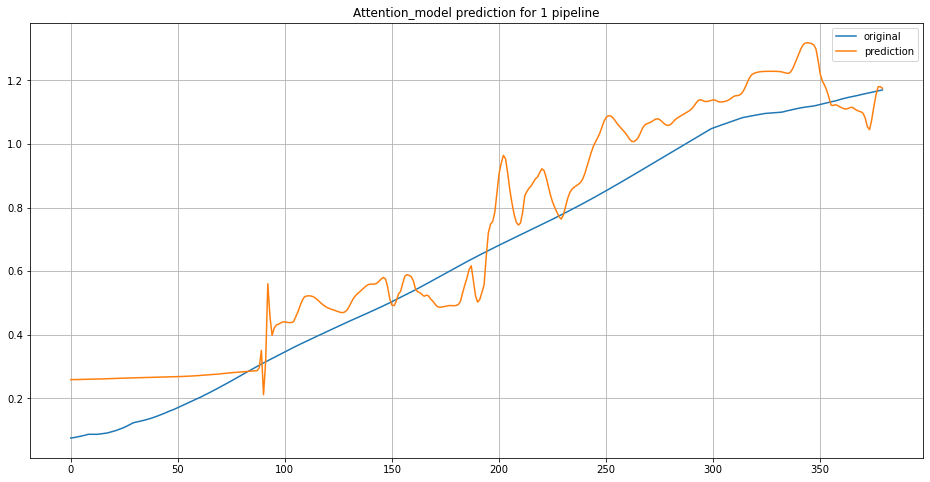

In [20]:
fig = plt.figure(figsize=(16, 8))
plt.plot(true_array, label = 'original')
plt.title('Attention_model prediction for 1 pipeline')
plt.plot(prediction_array, label = 'prediction'  )
plt.grid()
plt.legend(loc='best');

In [273]:
l = pd.Series([MSE_score,HuberLoss_score],name='Attention_NN_Model', index =['MSE_Loss', 'HuberLoss'] )
df_algo_results = df_algo_results.append(l)
df_algo_results

,MSE_Loss,HuberLoss
DecisionTree,0.097623,0.048812
RandomForest,0.097429,0.048715
XGBRegressor,0.214949,0.106837
LGBMRegressor,0.076177,0.038088
LR,72.072907,19.054029
Attention_NN_Model,0.031564,0.015770


In [277]:
df_algo_results.sort_values(by='MSE_Loss',inplace=True)

<Figure size 1152x576 with 0 Axes>

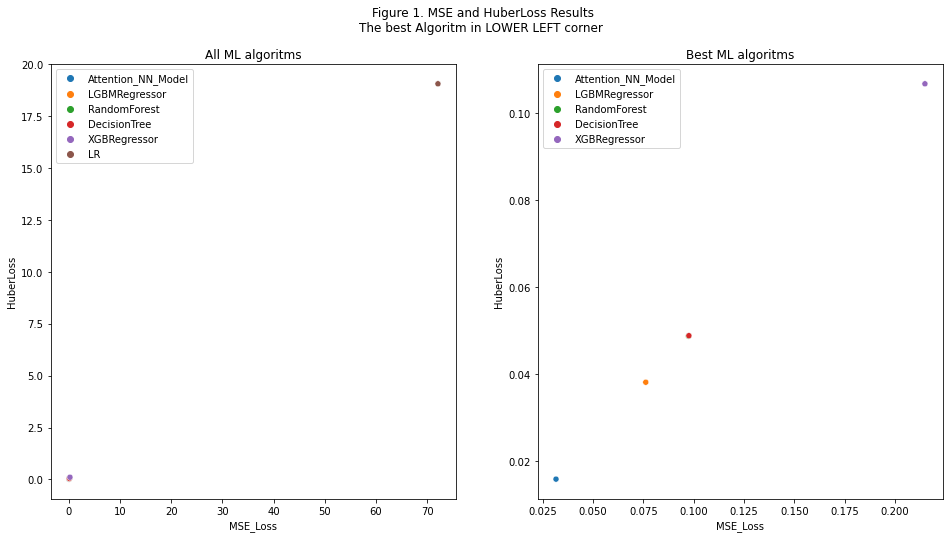

In [278]:
fig = plt.figure(figsize=(16, 8))
fig, (ax0,ax1) = plt.subplots( nrows=1, ncols=2, figsize=(16, 8) )

ax0.set_title('All ML algoritms')
sns.scatterplot(x= 'MSE_Loss' ,y='HuberLoss', data = df_algo_results,
                hue=df_algo_results.index, ax=ax0)

ax1.set_title('Best ML algoritms')
sns.scatterplot(x= 'MSE_Loss' ,y='HuberLoss', data = df_algo_results.iloc[:-1,:],
                hue=df_algo_results.index[:-1], ax=ax1)

fig.suptitle('Figure 1. MSE and HuberLoss Results\nThe best Algoritm in LOWER LEFT corner ')
fig.savefig('../models/comparison/Algoritms MSE and HuberLoss Results.png')
plt.show();
